### lab-6 boosting / Градиентный бустинг
Мисюрина Ирина

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать категориальные и количественные признаки.

In [1]:
!wget https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv

--2024-05-15 06:15:29--  https://raw.githubusercontent.com/IraMeis/ai-tech-spring24/main/datasets/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2772143 (2.6M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   2.64M  --.-KB/s    in 0.01s   

2024-05-15 06:15:29 (268 MB/s) - ‘diamonds.csv’ saved [2772143/2772143]



In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

   - Привести описание датасета.

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|carat|масса|карат|
|cut|огранка|категория (средняя, хорошая, очень хорошая, премиум, идеальная)
|color|цвет|категория|
|clarity|прозрачность|категория|
|depth|высота|мм|
|table|ширина|мм|
|price|цена|у.е. (скорее всего доллары)|
|x|геометрия по оси x|мм|
|y|геометрия по оси y|мм|
|z|геометрия по оси z|мм|

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [3]:
#no null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


   - Нормализовать численные данные.

In [4]:
numeric = [df.columns[i] for i in range(df.shape[1]) if df.dtypes[df.columns[i]] != 'object']
numeric

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric])
df[numeric] = scaler.transform(df[numeric])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,Ideal,E,SI2,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,Premium,E,SI1,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,Good,E,VS1,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,Premium,I,VS2,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,Good,J,SI2,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

In [6]:
# предсказываем категроию (огранка)
X, y = df.drop(['cut'], axis=1), df['cut']

In [8]:
from sklearn.model_selection import train_test_split
X_train_no_code, X_test_no_code, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(37758,) (16182,)


Словари для LabelEncoding

In [9]:
keys, values = pd.factorize(X['color'].unique())
d_color = dict(zip(values, keys))
keys, values = pd.factorize(y.unique())
d_cut = dict(zip(values, keys))
keys, values = pd.factorize(X['clarity'].unique())
d_clarity = dict(zip(values, keys))

In [10]:
X_train_code, X_test_code = X_train_no_code.copy(), X_test_no_code.copy()

X_train_code['color'] = X_train_code['color'].replace(d_color)
X_train_code['clarity'] = X_train_code['clarity'].replace(d_clarity)

X_test_code['color'] = X_test_code['color'].replace(d_color)
X_test_code['clarity'] = X_test_code['clarity'].replace(d_clarity)

3. Для каждого из классификаторов ($AdaBoost$, $GradientBoostingClassifier$, $XGBoost$, $CatBoost$):
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).
   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
   - Итого получить 6 обученных моделей.
   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).
   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).

In [11]:
!pip install catboost xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
ada_grid = {
    'n_estimators': range(10, 101, 10),
    'learning_rate': np.arange(0.01, 0.57, 0.05),
}

ada_model = AdaBoostClassifier(algorithm="SAMME")
ada_search = GridSearchCV(ada_model, ada_grid, cv=3)
ada_search.fit(X_train_code, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56]),
                         'n_estimators': range(10, 101, 10)})

In [ ]:
ada_search.best_params_

{'learning_rate': 0.46, 'n_estimators': 100}

In [ ]:
grad_grid = {
    'n_estimators': range(0, 121, 30),
    'learning_rate': np.arange(0.1, 0.61, 0.15),
    'max_depth': range(2, 6),
}

grad_model = GradientBoostingClassifier()
grad_search = GridSearchCV(grad_model, grad_grid, cv = 3)
grad_search.fit(X_train_code, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1 , 0.25, 0.4 , 0.55]),
                         'max_depth': range(2, 6),
                         'n_estimators': range(0, 121, 30)})

In [ ]:
grad_search.best_params_

{'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 120}

In [ ]:
xgb_grid = {
    'n_estimators': range(0, 121, 30),
    'learning_rate': np.arange(0.1, 0.61, 0.15),
    'max_depth': range(2, 6),
}

xgb_model = XGBClassifier()
xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)
xgb_search.fit(X_train_code, y_train.replace(d_cut))

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [ ]:
xgb_search.best_params_

{'learning_rate': 0.5499999999999999, 'max_depth': 4, 'n_estimators': 120}

In [ ]:
xgb_grid = {
    'n_estimators': [120],
    'learning_rate': [0.55],
    'max_depth': [4],
    'gamma': np.arange(0, 1.5, 0.5),
    'lambda': np.arange(0, 1.5, 0.5),
    'alpha': np.arange(0, 1.5, 0.5),
}

xgb_model = XGBClassifier()
xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=3)
xgb_search.fit(X_train_code, y_train.replace(d_cut))

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [ ]:
xgb_search.best_params_

{'alpha': 0.0,
 'gamma': 0.0,
 'lambda': 1.0,
 'learning_rate': 0.55,
 'max_depth': 4,
 'n_estimators': 120}

In [15]:
from catboost import Pool
train_data_cat_cb = Pool(data=X_train_code, label=y_train)
test_data_cat_cb = Pool(data=X_test_code, label=y_test)

In [ ]:
cat_model = CatBoostClassifier(random_state=0, logging_level='Silent')

cat_grid = {
    'iterations': [500],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'early_stopping_rounds': [10]
}
cat_grid_search_result = cat_model.grid_search(cat_grid,
                                               train_data_cat_cb,
                                               cv=5,
                                               train_size=0.9375,
                                               verbose=False,
                                               plot=False)

In [ ]:
cat_grid_search_result['params']

{'depth': 6, 'od_wait': 10, 'learning_rate': 0.5, 'iterations': 500}

In [16]:
ada_best = AdaBoostClassifier(learning_rate=0.46, n_estimators=100, algorithm="SAMME")
ada_best.fit(X_train_code, y_train)

grad_best = GradientBoostingClassifier(learning_rate=0.25, max_depth=4, n_estimators=120)
grad_best.fit(X_train_code, y_train)

xgb_best = XGBClassifier(alpha=0.0, gamma=0.0, reg_lambda=1, learning_rate=0.55, max_depth=4, n_estimators=120)
xgb_best.fit(X_train_code, y_train.replace(d_cut))

cat_best = CatBoostClassifier(depth=6, learning_rate=0.5, iterations=500, verbose=False)
cat_best.fit(train_data_cat_cb)

   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".

In [17]:
cat_cols = [var for var in X_train_no_code.columns if X_train_no_code[var].dtype == 'object']
X_cat_train_cb = X_train_no_code.copy(deep=True)
X_cat_test_cb = X_test_no_code.copy(deep=True)

for col in cat_cols:
    X_cat_train_cb[col] = pd.Categorical(X_cat_train_cb[col])
    X_cat_test_cb[col] = pd.Categorical(X_cat_test_cb[col])

train_data_cat_as_is = Pool(data=X_cat_train_cb, label=y_train, cat_features=cat_cols)
test_data_cat_as_is = Pool(data=X_cat_test_cb, label=y_test, cat_features=cat_cols)

xgb_as_is_best = XGBClassifier(alpha=0.0,
                               gamma=0.0,
                               reg_lambda=1,
                               learning_rate=0.55,
                               max_depth=4,
                               n_estimators=120,
                               enable_categorical=True)
xgb_as_is_best.fit(X_cat_train_cb, y_train.replace(d_cut))

cat_as_is_best = CatBoostClassifier(depth=6,
                                    learning_rate=0.5,
                                    iterations=500,
                                    verbose=False)
cat_as_is_best.fit(train_data_cat_as_is)

   - Итого получить 6 обученных моделей.

In [18]:
models = {
    'AdaBoostClassifier': ada_best,
    'GradientBoostingClassifier': grad_best,
    'XGBClassifier coded': xgb_best,
    'CatBoostClassifier coded': cat_best,
    'XGBClassifier as is': xgb_as_is_best,
    'CatBoostClassifier as is': cat_as_is_best,
}

   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).

In [19]:
from sklearn.metrics import classification_report

test_sets = {
    'AdaBoostClassifier': (X_test_code, y_test),
    'GradientBoostingClassifier': (X_test_code, y_test),
    'XGBClassifier coded': (X_test_code, y_test.replace(d_cut)),
    'CatBoostClassifier coded': (X_test_code, y_test),
    'XGBClassifier as is': (X_cat_test_cb, y_test.replace(d_cut)),
    'CatBoostClassifier as is': (X_cat_test_cb, y_test),
}

for k, v in models.items():
    print(f"\n{k}")
    test_data = test_sets[k]
    y_pred = v.predict(test_data[0])
    print(classification_report(test_data[1], y_pred))


AdaBoostClassifier
              precision    recall  f1-score   support

        Fair       0.88      0.70      0.78       487
        Good       0.55      0.51      0.53      1500
       Ideal       0.79      0.94      0.86      6487
     Premium       0.58      0.88      0.70      4142
   Very Good       0.56      0.06      0.10      3566

    accuracy                           0.68     16182
   macro avg       0.67      0.62      0.59     16182
weighted avg       0.66      0.68      0.62     16182


GradientBoostingClassifier
              precision    recall  f1-score   support

        Fair       0.89      0.91      0.90       487
        Good       0.81      0.69      0.75      1500
       Ideal       0.83      0.91      0.87      6487
     Premium       0.82      0.81      0.82      4142
   Very Good       0.68      0.60      0.64      3566

    accuracy                           0.80     16182
   macro avg       0.81      0.79      0.79     16182
weighted avg       0.79      

   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

Лучших моделей оказалось несколько: все, кроме AdaBoost, показали +- одинаковую точность

Лучшей моделью далее будем считать "XGBClassifier as is"

In [20]:
best = models['XGBClassifier as is']

4. Важность признаков:
   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.
   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.
   - Построить график `shap.plots.bar` для одного объекта выборки.
   - Построить график `shap.plots.waterfall` для одного объекта выборки.
   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.
   - Построить график `shap.plots.beeswarm` для всех признаков.
   - Построить график `shap.plots.bar` для всех признаков.
   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
   - Сравнить метрики до и после фильтрации.
   - Визуализировать полученное дерево решений.

   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.

In [22]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.2 MB/s eta 0:00:00


In [23]:
import shap
tree_explainer = shap.TreeExplainer(best)
shap_values = tree_explainer.shap_values(X_cat_train_cb)

   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.

In [25]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value[0], shap_values[0,:,0], X_cat_train_cb.iloc[0,:])

from IPython.display import HTML
HTML(f"<div>{shap.getjs() + shap_fp.html()}</div>")

In [26]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value[0], shap_values[0:100,:,0], X_cat_train_cb.iloc[0:100,:])

from IPython.display import HTML
HTML(f"<div>{shap.getjs() + shap_fp.html()}</div>")

   - Построить график `shap.plots.bar` для одного объекта выборки.

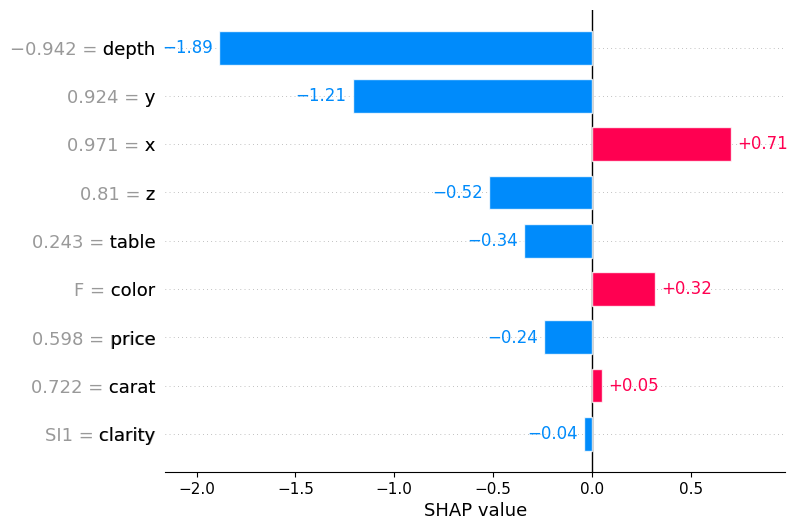

In [27]:
df_shap_values = tree_explainer(X_cat_train_cb)
shap_bp = shap.plots.bar(df_shap_values[-1, :, -1], max_display=X_cat_train_cb.shape[1])

   - Построить график `shap.plots.waterfall` для одного объекта выборки.

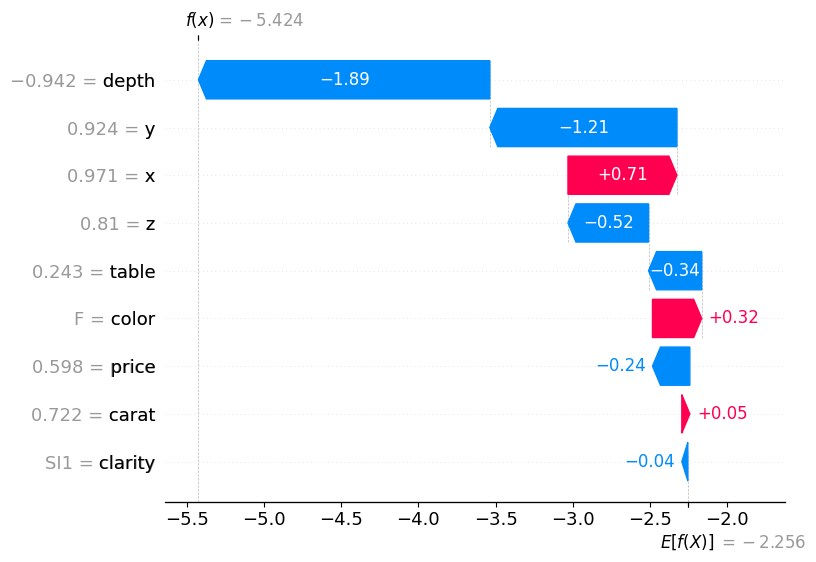

In [28]:
shap.plots.waterfall(df_shap_values[-1, :, -1], max_display=X_cat_train_cb.shape[1])

   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.

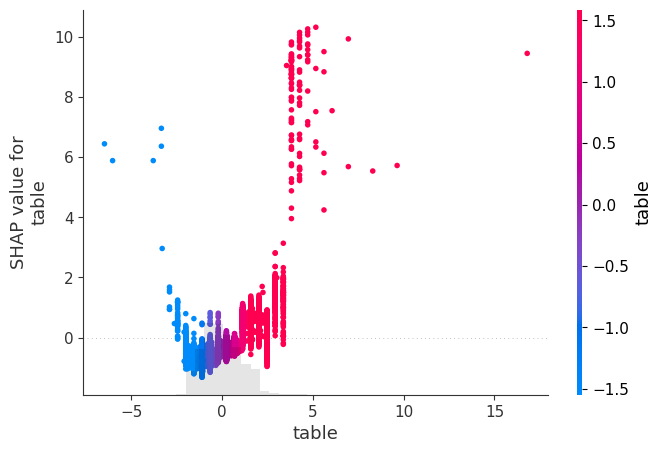

In [29]:
shap.plots.scatter(df_shap_values[:, "table", -1], color=df_shap_values[:, "table", -1])

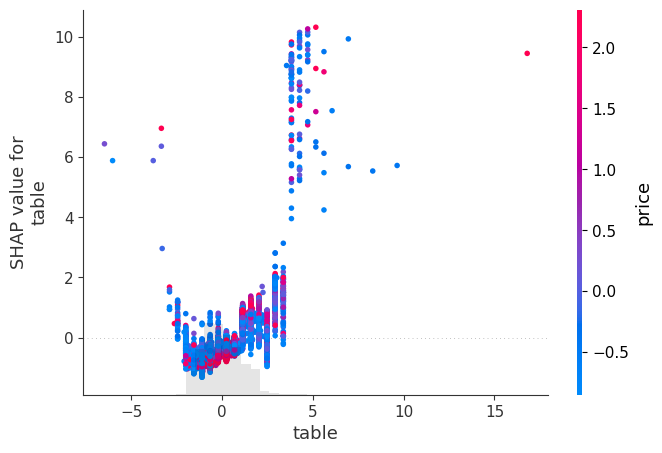

In [30]:
shap.plots.scatter(df_shap_values[:, "table", -1], color=df_shap_values[:, "price", -1])

   - Построить график `shap.plots.beeswarm` для всех признаков.

<Axes: xlabel='SHAP value (impact on model output)'>

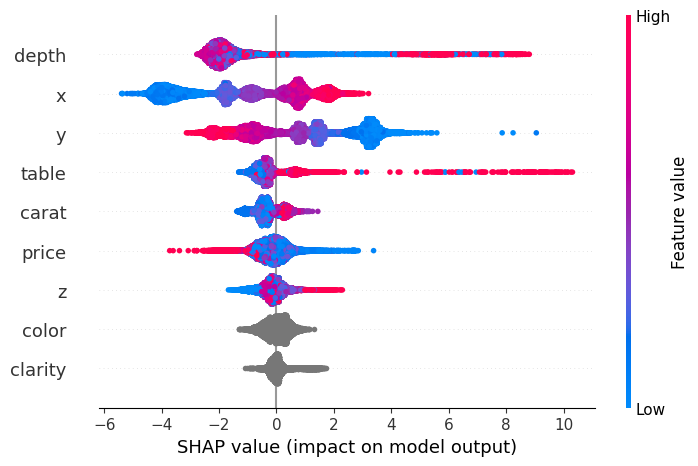

In [31]:
shap.plots.beeswarm(df_shap_values[:, :, -1], max_display=X_cat_train_cb.shape[1], show=False)

   - Построить график `shap.plots.bar` для всех признаков.

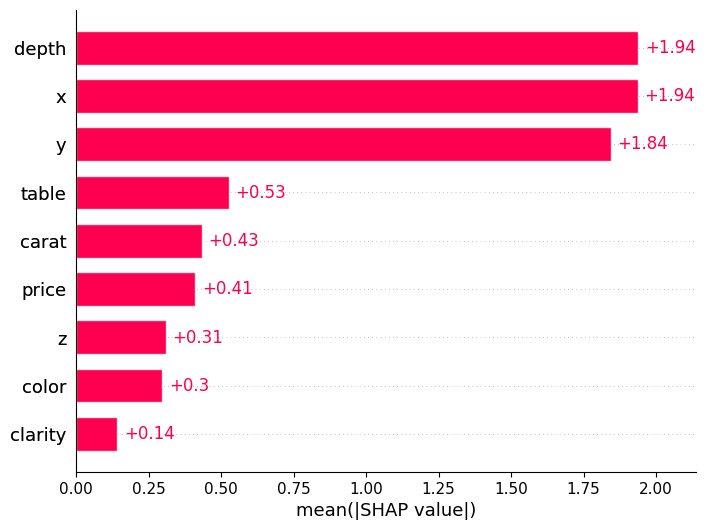

In [32]:
shap_bp = shap.plots.bar(df_shap_values[:, :, -1], max_display=X_cat_train_cb.shape[1])

   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.

Оставим признаки, у которых среднее значение SHAP больше 0.5

In [33]:
filter_cols = ['depth', 'x', 'y', 'table']

In [34]:
best.fit(X_cat_train_cb[filter_cols], y_train.replace(d_cut))

XGBClassifier(alpha=0.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.55, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, ...)

   - Сравнить метрики до и после фильтрации.

In [35]:
y_pred = best.predict(X_cat_test_cb[filter_cols])
print(classification_report(y_test.replace(d_cut), y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6487
           1       0.84      0.81      0.82      4142
           2       0.80      0.71      0.75      1500
           3       0.68      0.61      0.64      3566
           4       0.92      0.90      0.91       487

    accuracy                           0.80     16182
   macro avg       0.81      0.79      0.80     16182
weighted avg       0.80      0.80      0.80     16182



Метрики остались теми же

   - Визуализировать полученное дерево решений.

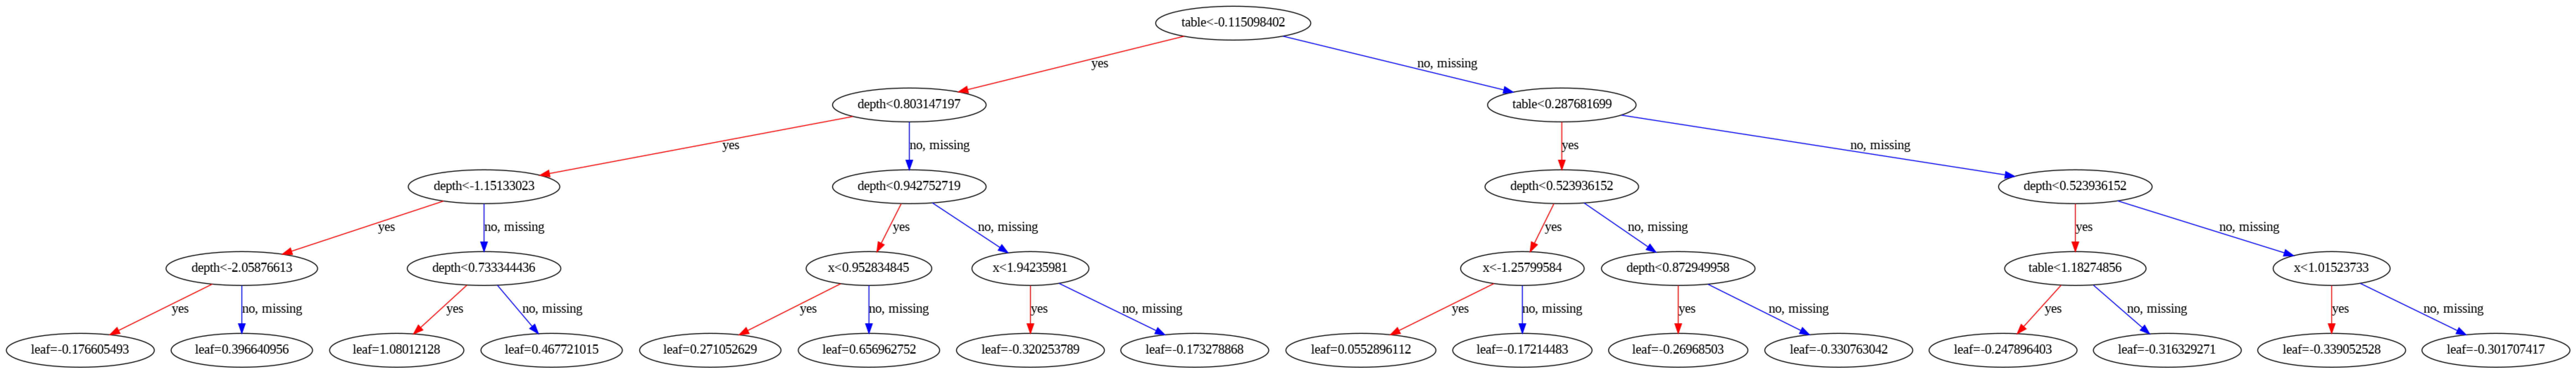

In [36]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(120, 120))
plot_tree(best, num_trees=0, feature_names=filter_cols, ax=ax)
plt.show()

5. Регрессия:
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.
   - Сравнить метрики до и после фильтрации.

   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.

In [37]:
from catboost import CatBoostRegressor

target_train = X_cat_train_cb['price']
X_train_regr = pd.concat([X_cat_train_cb.drop(['price'], axis=1), y_train], axis=1)
X_train_regr['cut'] = pd.Categorical(X_train_regr['cut'])

target_test = X_cat_test_cb['price']
X_test_regr = pd.concat([X_cat_test_cb.drop(['price'], axis=1), y_test], axis=1)
X_test_regr['cut'] = pd.Categorical(X_test_regr['cut'])

In [39]:
cat_model = CatBoostRegressor(random_state=0, logging_level='Silent')
cat_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01],
    'depth': [4, 6, 8, 10],
    'early_stopping_rounds': [10]
}

cat_cols = [var for var in X_train_regr.columns if X_train_regr[var].dtype == 'category']
train_data_cat_cb = Pool(data=X_train_regr, label=target_train, cat_features=cat_cols)
test_data_cat_cb = Pool(data=X_test_regr, label=target_test, cat_features=cat_cols)

cat_grid_search_result = cat_model.grid_search(cat_grid,
                                               train_data_cat_cb,
                                               cv=5,
                                               train_size=0.9375,
                                               verbose=False,
                                               plot=False)

   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.

In [40]:
cat_grid_search_result['params']

{'depth': 10, 'od_wait': 10, 'learning_rate': 0.1, 'iterations': 500}

In [41]:
best = CatBoostRegressor(depth=10, learning_rate=0.1, iterations=500, logging_level='Silent')
best.fit(X_train_regr, target_train, cat_features=cat_cols)
y_pred = best.predict(X_test_regr)

In [42]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
print(f"MSE: {MSE(target_test, y_pred):.3f}")
print(f"MAE: {MAE(target_test, y_pred):.3f}")
print(f"R2 score: {R2(target_test, y_pred):.3f}")

MSE: 0.018
MAE: 0.068
R2 score: 0.982


   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.

In [43]:
filter_cols = ['depth', 'x', 'y', 'table']

In [44]:
best.fit(X_train_regr[filter_cols], target_train)
y_pred = best.predict(X_test_regr[filter_cols])

   - Сравнить метрики до и после фильтрации.

In [45]:
print(f"MSE: {MSE(target_test, y_pred):.3f}")
print(f"MAE: {MAE(target_test, y_pred):.3f}")
print(f"R2 score: {R2(target_test, y_pred):.3f}")

MSE: 0.115
MAE: 0.193
R2 score: 0.883


Метрики стали хуже